<h1 style="text-align: center;">Artificial Intelligence for Predicting Patients’ Responses to Thyroid Cancer Treatment</h1>

# Data Acquisition and Uploading

In [1]:
# Import all required libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Upload data and create a dataframe (df)

df = pd.read_csv('Thyroid_Diff.csv')

df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


# Exploratory Data Analysis

In [3]:
# Check the dataset size, columns names, data types, and number of missing values. 
print("Shape of the dataset:", df.shape, "\n")

print("Data summary:")

df.info()

Shape of the dataset: (383, 17) 

Data summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    obje

In [4]:
# Remove not needed column (Recurred)
df = df.drop("Recurred", axis=1)

df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete


In [5]:
# Summary statistics for numerical column (age)
print("\nSummary statistics for the numerical column:")

df.describe()


Summary statistics for the numerical column:


,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


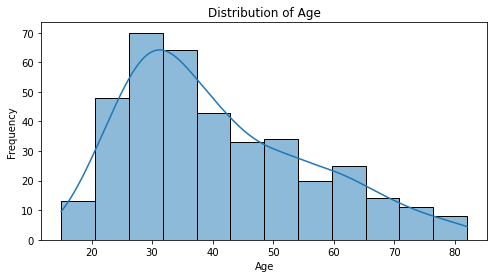

In [6]:
# Visualize the distribution of numerical column (age)
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

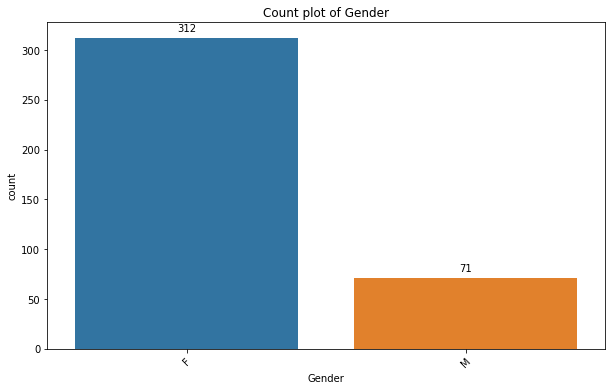

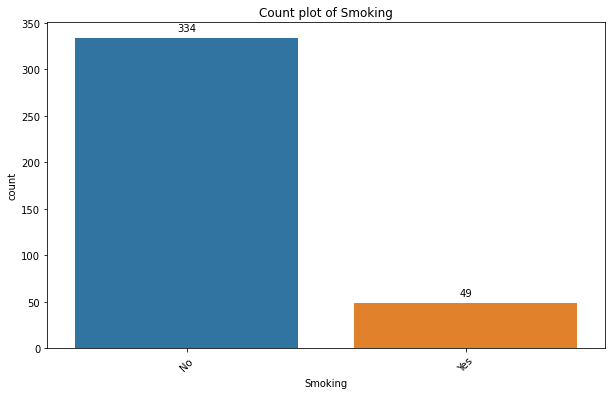

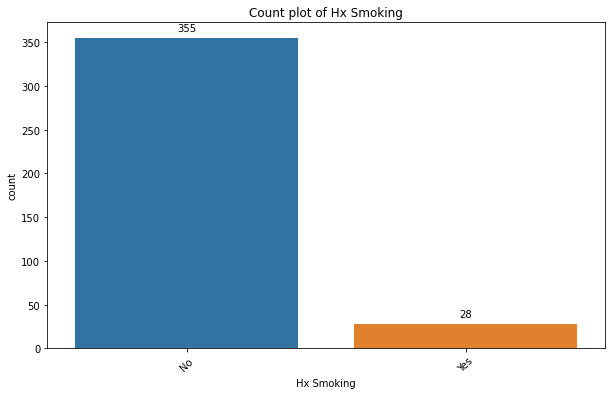

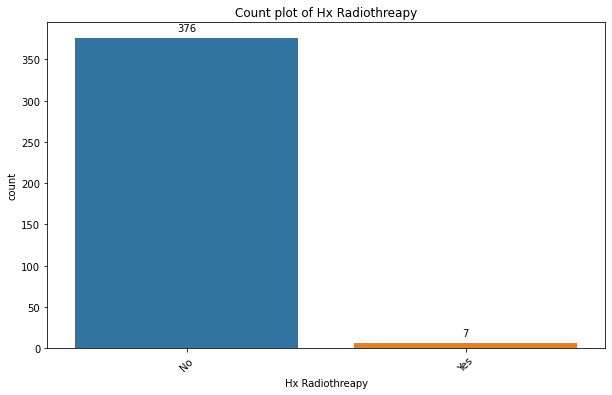

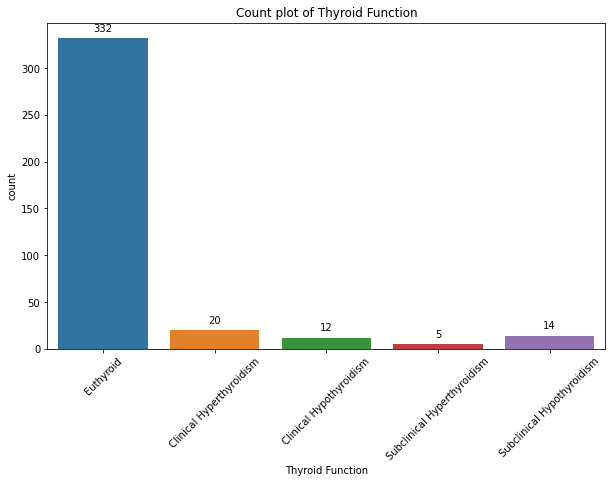

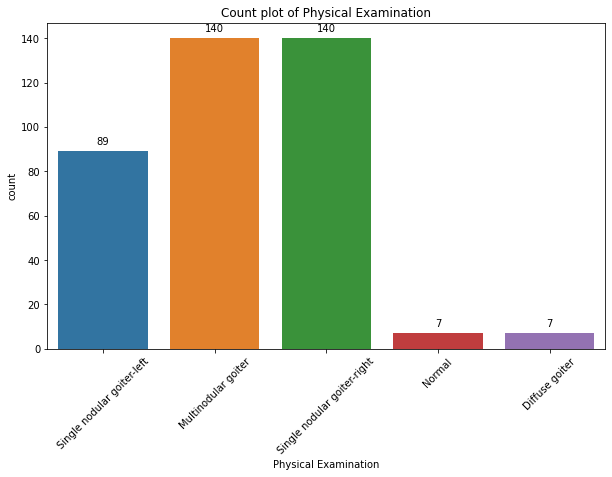

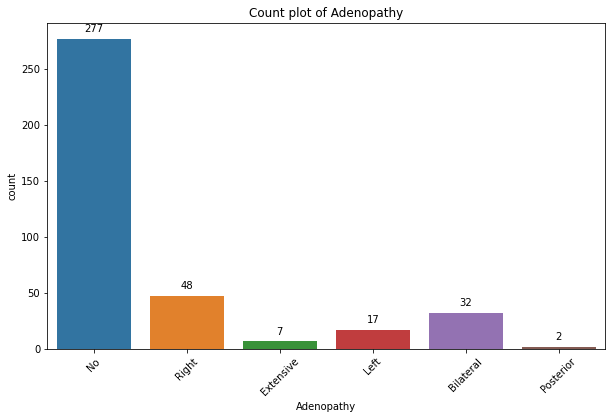

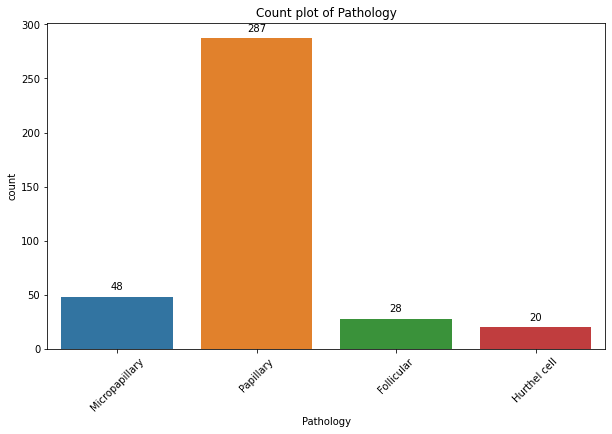

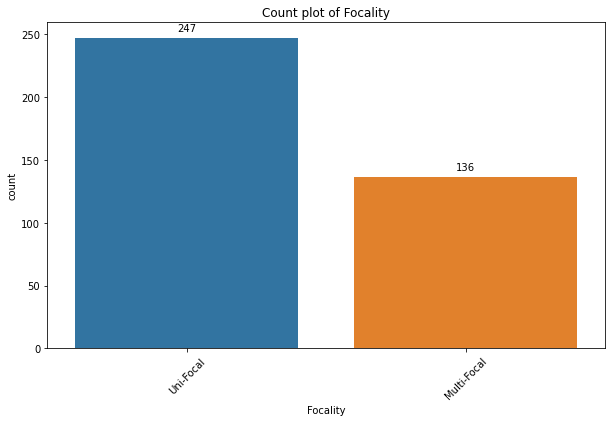

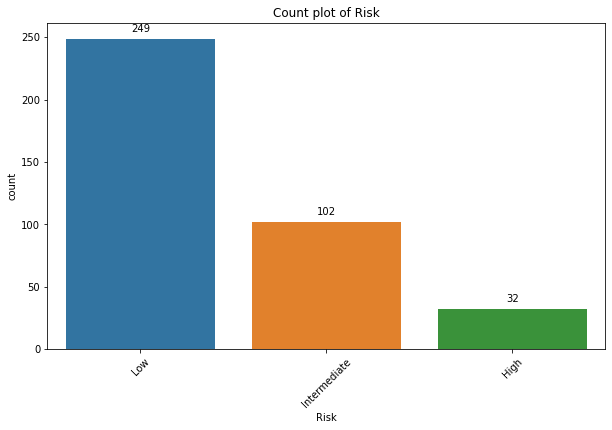

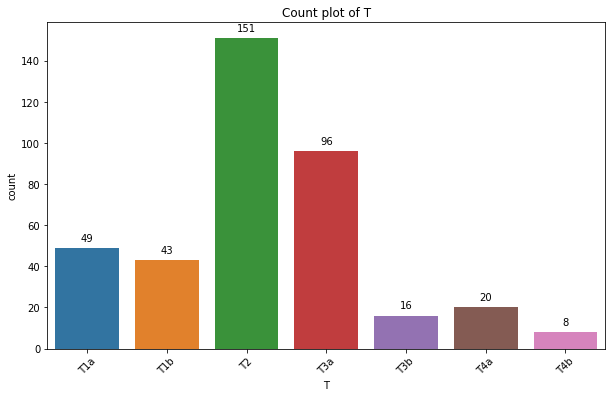

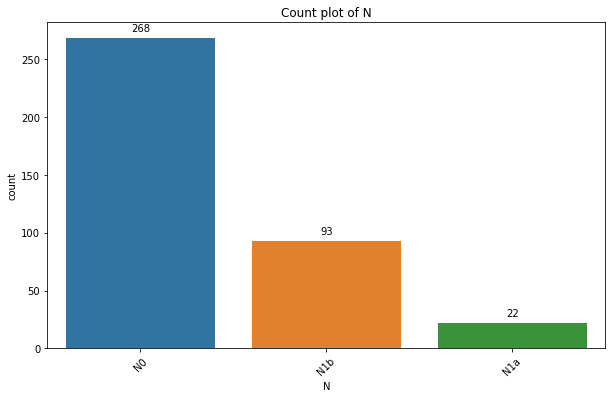

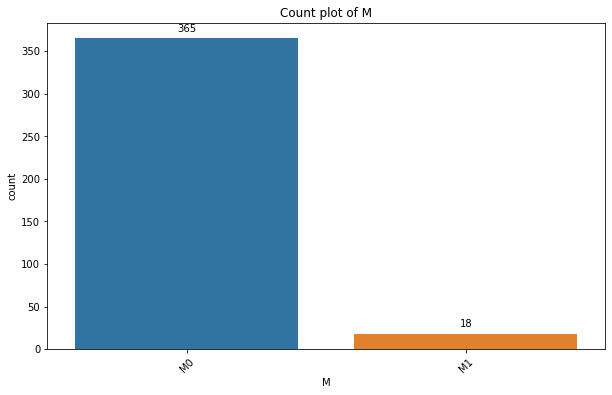

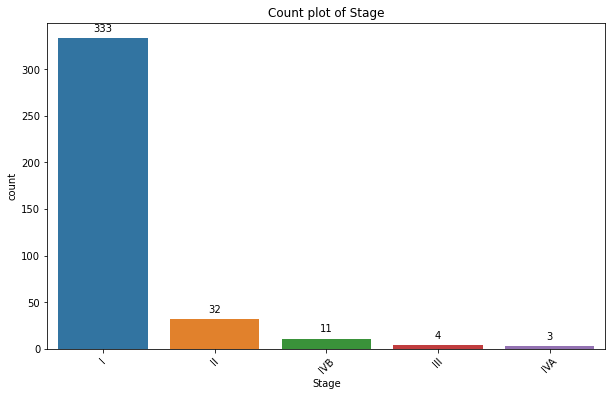

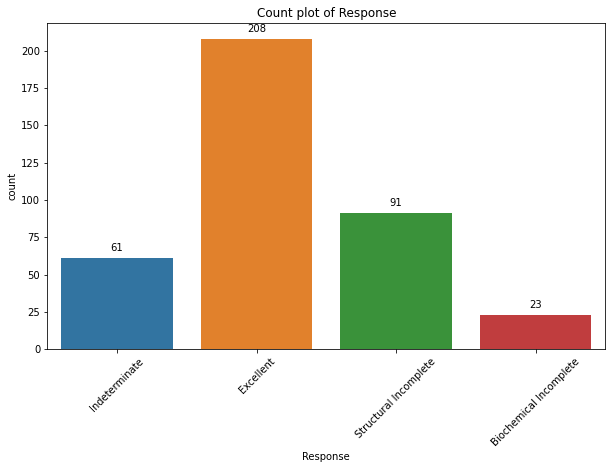

In [7]:
# Visualize count plots for categorical columns
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=45)
    # Display counts on top of each bar
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.show()

In [8]:
# Encode categorical variables using "map" function 

df["Gender"] = df["Gender"].map({"M":0, "F":1})

df["Smoking"] = df["Smoking"].map({"No":0, "Yes":1})

df["Hx Smoking"] = df["Hx Smoking"].map({"No":0, "Yes":1})

df["Hx Radiothreapy"] = df["Hx Radiothreapy"].map({"No":0, "Yes":1})

df["Thyroid Function"] = df["Thyroid Function"].map({"Euthyroid":1, "Clinical Hyperthyroidism":2, "Subclinical Hyperthyroidism": 3,"Clinical Hypothyroidism":4, "Subclinical Hypothyroidism":5})

df["Physical Examination"] = df["Physical Examination"].map({"Normal": 1,"Multinodular goiter":2, "Single nodular goiter-right":3, "Single nodular goiter-left":4, "Diffuse goiter":5})

df["Adenopathy"] = df["Adenopathy"].map({"No":0, "Right":1, "Left": 2, "Bilateral": 3, "Extensive":4, "Posterior": 5})

df["Pathology"] = df["Pathology"].map({"Papillary":1, "Micropapillary":2, "Follicular": 3, "Hurthel cell":4})

df["Focality"] = df["Focality"].map({"Uni-Focal":0, "Multi-Focal":1})

df["Risk"] = df["Risk"].map({"Low":1, "Intermediate":2, "High": 3})

df["T"] = df["T"].map({"T1a":1, "T1b":2, "T2": 3, "T3a": 4, "T3b": 5, "T4a": 6, "T4b": 7})

df["N"] = df["N"].map({"N0":1, "N1a":2, "N1b": 3})

df["M"] = df["M"].map({"M0":0, "M1":1})

df["Stage"] = df["Stage"].map({"I":1, "II":2, "III": 3, "IVA": 4, "IVB": 5})

df["Response"] = df["Response"].map({"Excellent": 1, "Indeterminate": 2, "Structural Incomplete": 3, "Biochemical Incomplete": 4})

df.head(10)
# Encode categorical variables using LabelEncoder() function 
# from sklearn.preprocessing import LabelEncoder
# categorical_columns = ["Gender", "Smoking", "Hx Smoking","Hx Radiothreapy", "Thyroid Function", "Physical Examination", "Adenopathy", "Pathology", "Focality", "Risk", "T", "N", "M", "Stage", "Response"]
# label_encoder = LabelEncoder()
#for x in categorical_columns:
    #df[x] = label_encoder.fit_transform(df[x])

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,27,1,0,0,0,1,4,0,2,0,1,1,1,0,1,2
1,34,1,0,1,0,1,2,0,2,0,1,1,1,0,1,1
2,30,1,0,0,0,1,3,0,2,0,1,1,1,0,1,1
3,62,1,0,0,0,1,3,0,2,0,1,1,1,0,1,1
4,62,1,0,0,0,1,2,0,2,1,1,1,1,0,1,1
5,52,0,1,0,0,1,2,0,2,1,1,1,1,0,1,2
6,41,1,0,1,0,2,3,0,2,0,1,1,1,0,1,1
7,46,1,0,0,0,1,3,0,2,0,1,1,1,0,1,1
8,51,1,0,0,0,1,3,0,2,0,1,1,1,0,1,1
9,40,1,0,0,0,1,3,0,2,0,1,1,1,0,1,1


In [9]:
# Check data summary after encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   383 non-null    int64
 1   Gender                383 non-null    int64
 2   Smoking               383 non-null    int64
 3   Hx Smoking            383 non-null    int64
 4   Hx Radiothreapy       383 non-null    int64
 5   Thyroid Function      383 non-null    int64
 6   Physical Examination  383 non-null    int64
 7   Adenopathy            383 non-null    int64
 8   Pathology             383 non-null    int64
 9   Focality              383 non-null    int64
 10  Risk                  383 non-null    int64
 11  T                     383 non-null    int64
 12  N                     383 non-null    int64
 13  M                     383 non-null    int64
 14  Stage                 383 non-null    int64
 15  Response              383 non-null    int64
dtypes: int64

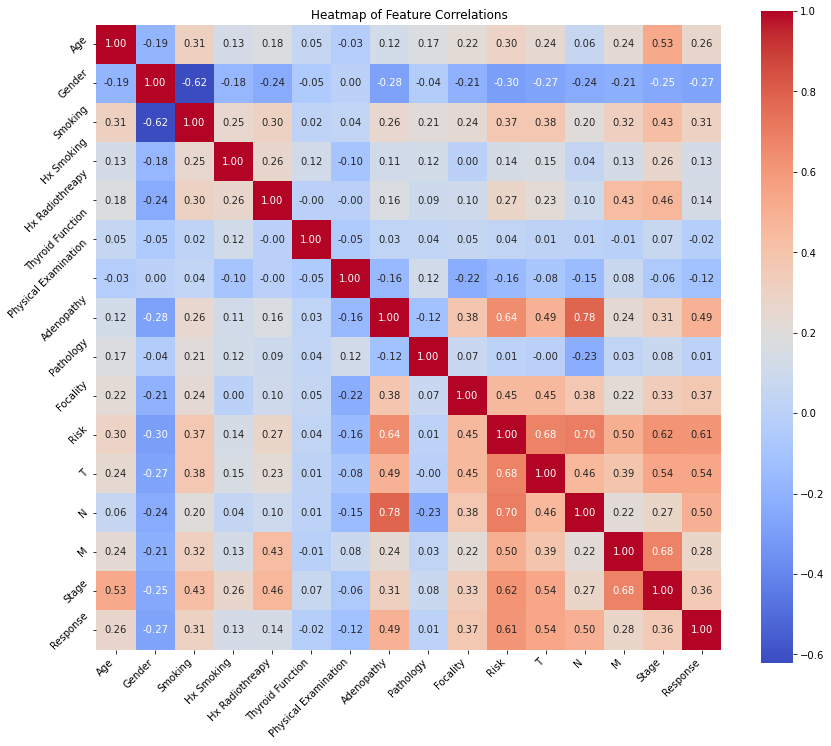

In [10]:
# Calculate the correlation matrix
corr = df.corr()

# Generate a heatmap
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Improve readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.title('Heatmap of Feature Correlations')

# Show plot
plt.show()

# Model Development and Evaluation

## (1) All features & 4 imbalanced classes

In [11]:
# Create 2 datafames from the dataset: features (X) and target variable (y)
X = df.drop(['Response'], axis=1)

y = df['Response']

In [12]:
# Split the data into 4 subsets: X_train, X_test, y_train, y_test, with 20% of data will be used for testing.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [13]:
# Import the AI models and metrics needed for development and evalution of the models.
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc, roc_auc_score

In [14]:
# Create a dictionary of the imported models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'LogR': LogisticRegression(random_state=42, max_iter=1000),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), random_state=42, max_iter=1000) 
}

In [15]:
# Train and evaluate the models            
results = {}   # a dictionary to store performance results for each algorithm to use in presenting the results in a table.  

roc_curves = {}  # A dictionary to store ROC curves for each model

for model_name, model in models.items():  # a FOR loop to train and evalute each model.
    
    model.fit(X_train, y_train)     # Train the model using the training data (X_train and y_train sets).
    
    y_pred = model.predict(X_test)  # Predict the treatment response using the testing dataset (X_test).
    
    accuracy = accuracy_score(y_test, y_pred)    # Evaluated the accuracy of each model. 
    
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify 'weighted' for multiclass precision.
    
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify 'weighted' for multiclass recall.
    
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify 'weighted' for multiclass f1.
    
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)  # Predict the probabilities for each class
        # Compute ROC curve and ROC area for each class
        n_classes = len(model.classes_)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test == i, y_probs[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        roc_curves[model_name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}
        auc_weighted = roc_auc_score(pd.get_dummies(y_test), y_probs, average='weighted')
    else:  # Use decision function for models without predict_proba
        y_scores = model.decision_function(X_test)
        y_scores = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min())
        fpr, tpr, _ = roc_curve(pd.get_dummies(y_test).values.ravel(), y_scores.ravel())
        roc_auc = auc(fpr, tpr)
        auc_weighted = roc_auc
    results[model_name] = {'Accuracy': round(accuracy, 3), 'Precision': round(precision, 3), 'Recall': round(recall, 3), 'F1 Score': round(f1, 3), 'AUC': round(auc_weighted, 3)} # Store performance results for each algorithm in the previously created dictionary. The resuls were rounded to the nearest 3 decimal places.

C:\Users\top\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\top\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\top\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\top\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\top\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\top\anaconda3\lib\site-packages\sklearn\metric

In [16]:
# Create a dataframe to display the performance results for each algorithm in a tabular format. 
results_df = pd.DataFrame(results).T   

print (results_df)

               Accuracy  Precision  Recall  F1 Score    AUC
Decision Tree     0.610      0.646   0.610     0.626  0.687
Naive Bayes       0.519      0.728   0.519     0.578  0.788
KNN               0.727      0.650   0.727     0.676  0.752
Random Forest     0.701      0.694   0.701     0.694  0.792
SVM               0.688      0.595   0.688     0.597  0.859
LogR              0.714      0.636   0.714     0.670  0.753
MLP               0.675      0.635   0.675     0.654  0.759


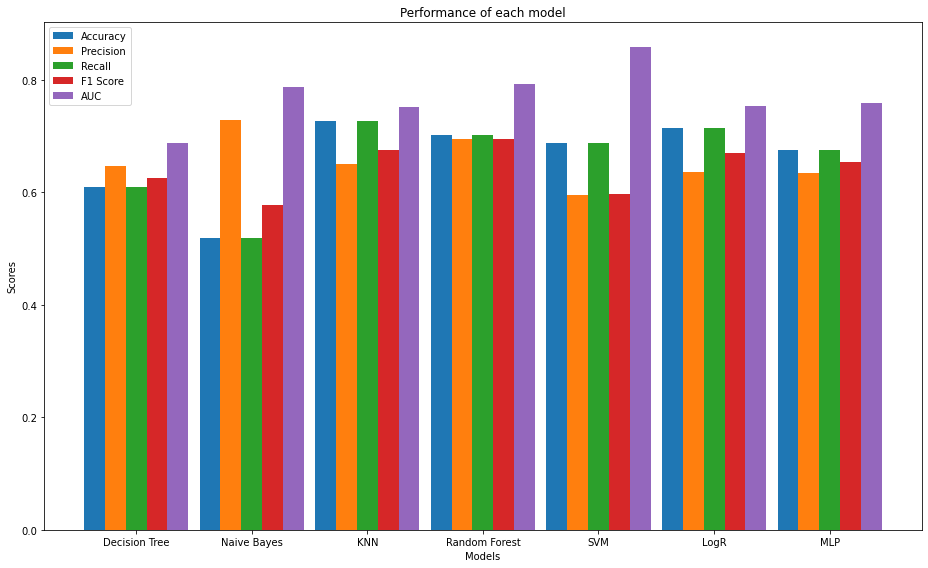

In [17]:
# Present results of all algorithms in a bar char for better comprehension.

# Extract model names from the dictionary "results", and create a list of these names. 
model_names = list(results.keys())

# Extract results for each algorithm. 
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']

values = [[results[model][metric] for model in model_names] for metric in metrics]   

bar_width = 0.18   

# Create an array of indices for the x-axis based on the number of models.
index = np.arange(len(model_names)) 

# Create a grouped bar plot for each metric.
plt.figure(figsize=(13, 8))    # create a new figure with a width of 13 inches and a height of 8 inches. 

for i in range(len(metrics)):  # Loops through each metric and plot a set of bars for each metric grouped by the index positions adjusted by the bar width.
    plt.bar(index + i * bar_width, values[i], bar_width, label=metrics[i])

# Identify the plot customizations.
plt.xlabel('Models')    # X axis label 
plt.ylabel('Scores')    # Y axis label
plt.title('Performance of each model')   # title of the plot 
plt.xticks(index + bar_width * (len(metrics) - 1) / 2, model_names)  # To set the position of the x_axis ticks at the center of each group of bars.
plt.legend()    # to show the a legend for each metrics.
plt.tight_layout()  # to adjust the subplot parameters to ensure the specified subplotd fit within the figure area.

# Show the plot.
plt.show()

## (2) All features & 4 balanced classes

In [18]:
# Create a dictionary of the imported models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'LogR': LogisticRegression(random_state=42, max_iter=1000),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42) 
}

In [19]:
# Import the sampling strategies.
#%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [20]:
# Define sampling strategies
sampling_strategies = {
    'None': None,
    'SMOTE': SMOTE(random_state=42),
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'RandomUnderSampler': RandomUnderSampler(random_state=42)
}

In [21]:
# Train and evaluate the models   
results = {}  # Initialize a dictionary to store performance results for each algorithm to use in presenting the results in a table.   

for strategy_name, sampler in sampling_strategies.items(): # A For Loop through models and sampling strategies to train and evalute each model.
    
    for model_name, model in models.items():
        
        pipeline = Pipeline([('sampler', sampler), ('model', model)]) if sampler else Pipeline([('model', model)])
        
        pipeline.fit(X_train, y_train)  # Train the model using the training data (X_train and y_train sets). 
        
        y_pred = pipeline.predict(X_test) # Predict the treatment response using the testing dataset (X_test).
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        
        if hasattr(model, "predict_proba"):
            y_probs = pipeline.predict_proba(X_test)
            auc_weighted = roc_auc_score(y_test, y_probs, multi_class='ovr', average='weighted')
        else:
            auc_weighted = float('nan')  # For models that do not support probability estimates
        
        # Store performance results for each algorithm in the previously created dictionary. The resuls were rounded to the nearest 3 decimal places.
        results[f"{model_name} | {strategy_name}"] = {
            'Accuracy': round(accuracy, 3),
            'Precision': round(precision, 3),
            'Recall': round(recall, 3),
            'F1 Score': round(f1, 3),
            'AUC': round(auc_weighted, 3)
        }

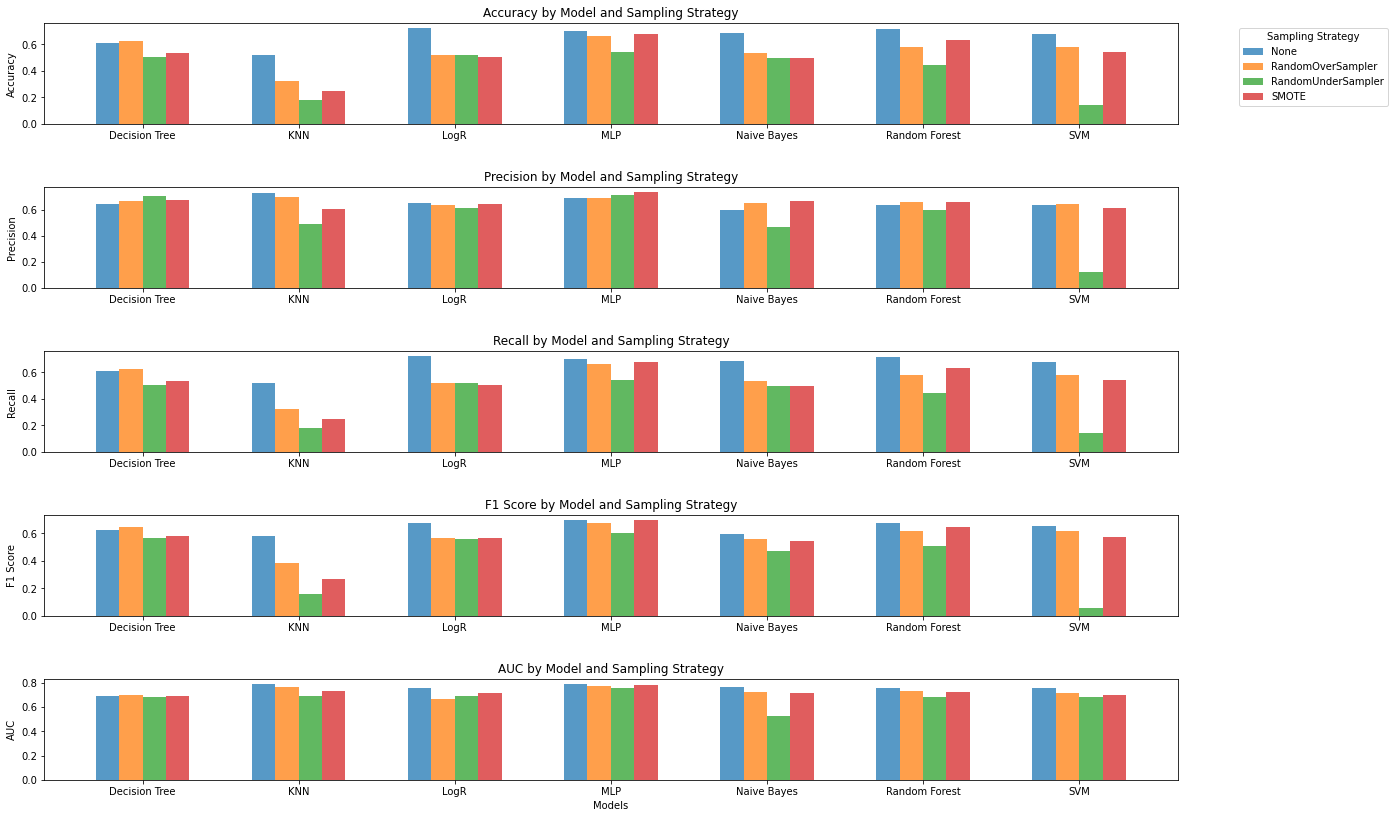

In [22]:
# Present results of all algorithms in a bar char for better comprehension.
model_names = sorted(set(key.split(" | ")[0] for key in results.keys()), key=lambda x: x.lower())

strategies = sorted(set(key.split(" | ")[1] for key in results.keys()), key=lambda x: x.lower())

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']

data = {metric: {strategy: [] for strategy in strategies} for metric in metrics}

for key, performance in results.items():
    model, strategy = key.split(" | ")
    for metric in metrics:
        data[metric][strategy].append(performance[metric])

n_models = len(model_names)
n_strategies = len(strategies)
bar_width = 0.15
index = np.arange(n_models)

plt.figure(figsize=(20, 12))

for i, metric in enumerate(metrics):
    plt.subplot(len(metrics), 1, i+1)
    for j, strategy in enumerate(strategies):
        positions = [p + (bar_width * j) for p in index]
        plt.bar(positions, data[metric][strategy], bar_width, label=f'{strategy}' if i == 0 else "", alpha=0.75)

    if i == 0:
        plt.legend(title='Sampling Strategy', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(index + bar_width * (n_strategies - 1) / 2, model_names)
    plt.ylabel(metric)
    plt.title(f'{metric} by Model and Sampling Strategy')

plt.xlabel('Models')
plt.tight_layout(pad=3.0)
plt.show()

### (3) Without weakly correlated features & 4 imbalanced classes

In [23]:
# Remove features (Thyroid Function and Pathology) that has weak correlation (<0.10) with treatment response
df_without = df.drop (["Thyroid Function","Pathology"], axis=1)

In [24]:
# Split the data into features and target
X = df_without.drop(['Response'], axis=1)

y = df_without['Response']

In [25]:
# Split the data into 4 subsets: X_train, X_test, y_train, y_test, with 20% of data will be used for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [26]:
# Create a dictionary of the imported models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=0),
    'SVM': SVC(random_state=0),
    'LogR': LogisticRegression(random_state=0, max_iter=1000),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

In [27]:
# Train and evaluate the models            
results = {}   # a dictionary to store performance results for each algorithm to present the results in a table.  

roc_curves = {}  # A dictionary to store ROC curves for each model

for model_name, model in models.items():  # a FOR loop to train and evalute each model.
    
    model.fit(X_train, y_train)     # Train the model using the training data (X_train and y_train sets).
    
    y_pred = model.predict(X_test)  # Predict the treatment response using the testing dataset (X_test).
    
    accuracy = accuracy_score(y_test, y_pred)    # Evaluated the accuracy of each model. 
    
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify 'weighted' for multiclass precision.
    
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify 'weighted' for multiclass recall.
    
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify 'weighted' for multiclass f1.
    
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)  # Predict the probabilities for each class
        # Compute ROC curve and ROC area for each class
        n_classes = len(model.classes_)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test == i, y_probs[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        roc_curves[model_name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}
        auc_weighted = roc_auc_score(pd.get_dummies(y_test), y_probs, average='weighted')
    else:  # Use decision function for models without predict_proba
        y_scores = model.decision_function(X_test)
        y_scores = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min())
        fpr, tpr, _ = roc_curve(pd.get_dummies(y_test).values.ravel(), y_scores.ravel())
        roc_auc = auc(fpr, tpr)
        auc_weighted = roc_auc
    results[model_name] = {'Accuracy': round(accuracy, 3), 'Precision': round(precision, 3), 'Recall': round(recall, 3), 'F1 Score': round(f1, 3), 'AUC': round(auc_weighted, 3)} # Store performance results for each algorithm in the previously created dictionary. The resuls were rounded to the nearest 3 decimal places.

C:\Users\top\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\top\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\top\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\top\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\top\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\top\anaconda3\lib\site-packages\sklearn\metric

In [28]:
# Create a dataframe to display the performance results for each algorithm in a tabular format. 
results_df = pd.DataFrame(results).T   

print (results_df)

               Accuracy  Precision  Recall  F1 Score    AUC
Decision Tree     0.610      0.622   0.610     0.616  0.670
Naive Bayes       0.390      0.707   0.390     0.465  0.799
KNN               0.649      0.616   0.649     0.622  0.759
Random Forest     0.714      0.697   0.714     0.705  0.787
SVM               0.688      0.595   0.688     0.597  0.858
LogR              0.753      0.633   0.753     0.685  0.757
MLP               0.727      0.619   0.727     0.665  0.724


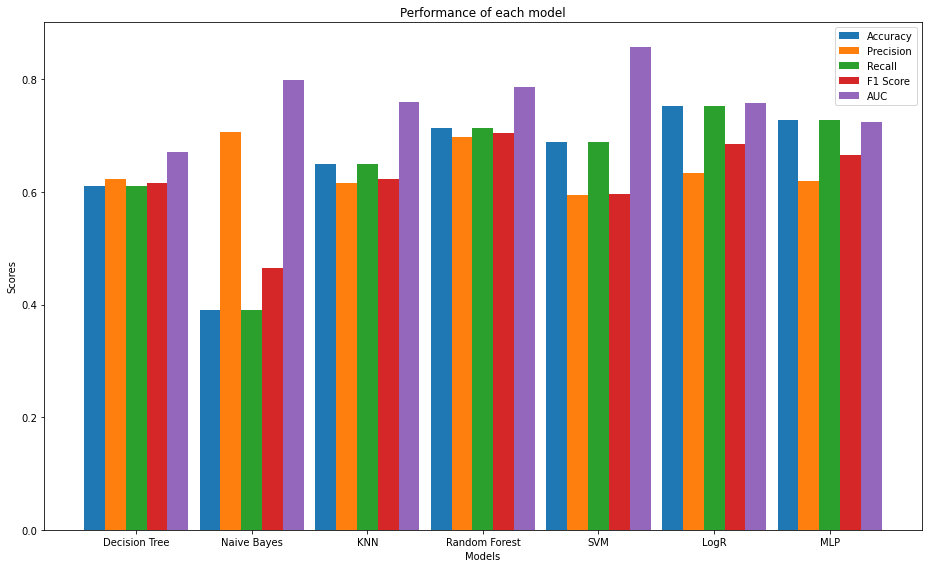

In [29]:
# Present results of all algorithms in a bar char for better comprehension.

# Extract model names from the dictionary "results", and create a list of these names. 
model_names = list(results.keys())

# Extract results for each algorithm. 
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']

values = [[results[model][metric] for model in model_names] for metric in metrics]   

bar_width = 0.18   

# Create an array of indices for the x-axis based on the number of models.
index = np.arange(len(model_names)) 

# Create a grouped bar plot for each metric.
plt.figure(figsize=(13, 8))    # I create a new figure with a width of 13 inches and a height of 8 inches. 

for i in range(len(metrics)):  # Loops through each metric and plot a set of bars for each metric grouped by the index positions adjusted by the bar width.
    plt.bar(index + i * bar_width, values[i], bar_width, label=metrics[i])

# Identify the plot customizations.
plt.xlabel('Models')    # X axis label 
plt.ylabel('Scores')    # Y axis label
plt.title('Performance of each model')   # title of the plot 
plt.xticks(index + bar_width * (len(metrics) - 1) / 2, model_names)  # To set the position of the x_axis ticks at the center of each group of bars.
plt.legend()    # to show the a legend for each metrics.
plt.tight_layout()  # to adjust the subplot parameters to ensure the specified subplotd fit within the figure area.

# Show the plot.
plt.show()

## (4) Without weakly correlated features & 4 balanced classes

In [30]:
# Create a dictionary of the imported models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'LogR': LogisticRegression(random_state=42, max_iter=1000),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=5000, random_state=42) 
}

In [31]:
# Define sampling strategies
sampling_strategies = {
    'None': None,
    'SMOTE': SMOTE(random_state=42),
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'RandomUnderSampler': RandomUnderSampler(random_state=42)
}

In [32]:
# Train and evaluate the models   
results = {}  # Initialize a dictionary to store performance results for each algorithm to use in presenting the results in a table.   

for strategy_name, sampler in sampling_strategies.items(): # A For Loop through models and sampling strategies to train and evalute each model.
    
    for model_name, model in models.items():
        
        pipeline = Pipeline([('sampler', sampler), ('model', model)]) if sampler else Pipeline([('model', model)])
        
        pipeline.fit(X_train, y_train)  # Train the model using the training data (X_train and y_train sets). 
        
        y_pred = pipeline.predict(X_test) # Predict the treatment response using the testing dataset (X_test).
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        
        if hasattr(model, "predict_proba"):
            y_probs = pipeline.predict_proba(X_test)
            auc_weighted = roc_auc_score(y_test, y_probs, multi_class='ovr', average='weighted')
        else:
            auc_weighted = float('nan')  # For models that do not support probability estimates
        
        # Store performance results for each algorithm in the previously created dictionary. The resuls were rounded to the nearest 3 decimal places.
        results[f"{model_name} | {strategy_name}"] = {
            'Accuracy': round(accuracy, 3),
            'Precision': round(precision, 3),
            'Recall': round(recall, 3),
            'F1 Score': round(f1, 3),
            'AUC': round(auc_weighted, 3)
        }

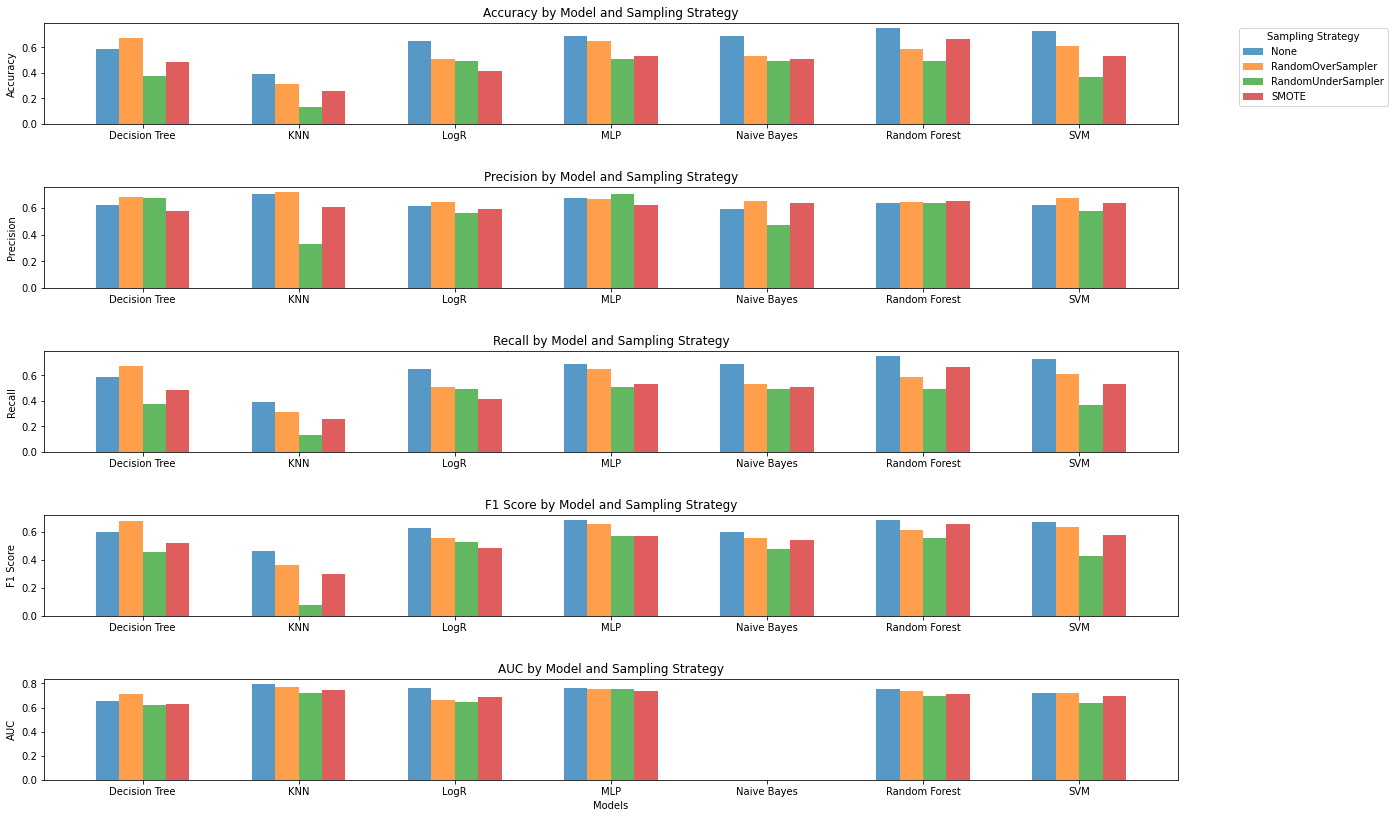

In [33]:
# Present results of all algorithms in a bar char for better comprehension.
model_names = sorted(set(key.split(" | ")[0] for key in results.keys()), key=lambda x: x.lower())

strategies = sorted(set(key.split(" | ")[1] for key in results.keys()), key=lambda x: x.lower())

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']

data = {metric: {strategy: [] for strategy in strategies} for metric in metrics}

for key, performance in results.items():
    model, strategy = key.split(" | ")
    for metric in metrics:
        data[metric][strategy].append(performance[metric])

n_models = len(model_names)
n_strategies = len(strategies)
bar_width = 0.15
index = np.arange(n_models)

plt.figure(figsize=(20, 12))

for i, metric in enumerate(metrics):
    plt.subplot(len(metrics), 1, i+1)
    for j, strategy in enumerate(strategies):
        positions = [p + (bar_width * j) for p in index]
        plt.bar(positions, data[metric][strategy], bar_width, label=f'{strategy}' if i == 0 else "", alpha=0.75)

    if i == 0:
        plt.legend(title='Sampling Strategy', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(index + bar_width * (n_strategies - 1) / 2, model_names)
    plt.ylabel(metric)
    plt.title(f'{metric} by Model and Sampling Strategy')

plt.xlabel('Models')
plt.tight_layout(pad=3.0)
plt.show()

## (5) With moderately-to-strongly correlated features & 4 imbalanced classes

In [34]:
# Create a dataframe containing features that has moderate or high correlation (>0.30) with treatment response in addtion to Treatment Response.
df_with = df[["Smoking", "Adenopathy", "Risk", "T", "N", "Focality", "Stage", "Response"]]

In [35]:
# Split the data into features and target
X = df[['Adenopathy', "Risk", "T", "N", "Smoking", "Focality", "Stage"]]

y = df['Response']

In [36]:
# Split the data into 4 subsets: X_train, X_test, y_train, y_test, with 20% of data will be used for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [37]:
# Create a dictionary of the imported models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'LogR': LogisticRegression(random_state=42, max_iter=1000),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000, random_state=42) 
}

In [38]:
# Train and evaluate the models            
results = {}   # a dictionary to store performance results for each algorithm to present the results in a table.  

roc_curves = {}  # A dictionary to store ROC curves for each model

for model_name, model in models.items():  # a FOR loop to train and evalute each model.
    
    model.fit(X_train, y_train)     # Train the model using the training data (X_train and y_train sets).
    
    y_pred = model.predict(X_test)  # Predict the treatment response using the testing dataset (X_test).
    
    accuracy = accuracy_score(y_test, y_pred)    # Evaluated the accuracy of each model. 
    
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify 'weighted' for multiclass precision.
    
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify 'weighted' for multiclass recall.
    
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)  # Specify 'weighted' for multiclass f1.
    
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)  # Predict the probabilities for each class
        # Compute ROC curve and ROC area for each class
        n_classes = len(model.classes_)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test == i, y_probs[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        roc_curves[model_name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}
        auc_weighted = roc_auc_score(pd.get_dummies(y_test), y_probs, average='weighted')
    else:  # Use decision function for models without predict_proba
        y_scores = model.decision_function(X_test)
        y_scores = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min())
        fpr, tpr, _ = roc_curve(pd.get_dummies(y_test).values.ravel(), y_scores.ravel())
        roc_auc = auc(fpr, tpr)
        auc_weighted = roc_auc
    results[model_name] = {'Accuracy': round(accuracy, 3), 'Precision': round(precision, 3), 'Recall': round(recall, 3), 'F1 Score': round(f1, 3), 'AUC': round(auc_weighted, 3)} # Store performance results for each algorithm in the previously created dictionary. The resuls were rounded to the nearest 3 decimal places.

C:\Users\top\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\top\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\top\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\top\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\top\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\top\anaconda3\lib\site-packages\sklearn\metric

In [40]:
# Create a dataframe to display the performance results for each algorithm in a tabular format. 
results_df = pd.DataFrame(results).T   

print (results_df)

               Accuracy  Precision  Recall  F1 Score    AUC
Decision Tree     0.701      0.672   0.701     0.685  0.734
Naive Bayes       0.740      0.683   0.740     0.707  0.796
KNN               0.701      0.641   0.701     0.666  0.745
Random Forest     0.701      0.672   0.701     0.685  0.728
SVM               0.753      0.642   0.753     0.693  0.875
LogR              0.740      0.630   0.740     0.680  0.767
MLP               0.701      0.659   0.701     0.678  0.734


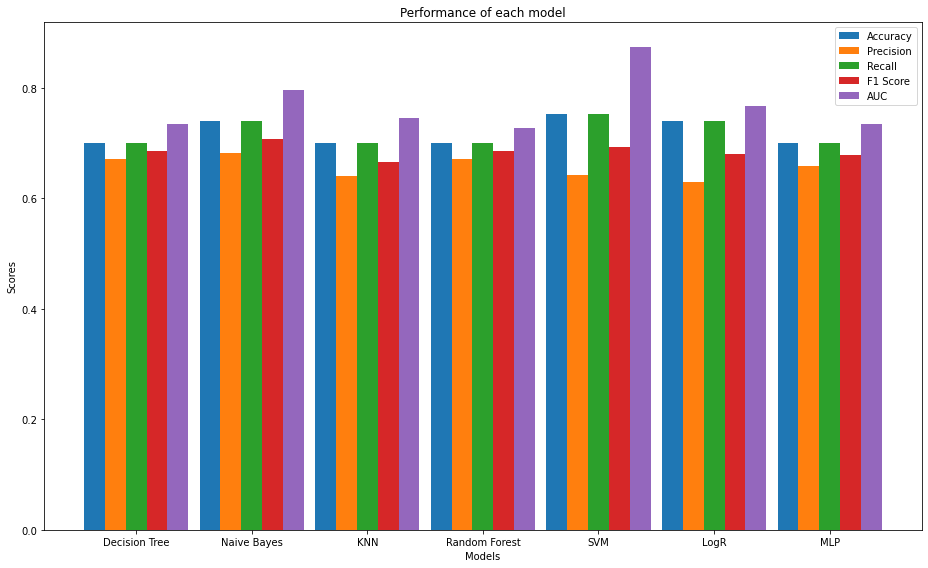

In [41]:
# Present results of all algorithms in a bar char for better comprehension.

# Extract model names from the dictionary "results", and create a list of these names. 
model_names = list(results.keys())

# Extract results for each algorithm. 
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']

values = [[results[model][metric] for model in model_names] for metric in metrics]   

bar_width = 0.18   

# Create an array of indices for the x-axis based on the number of models.
index = np.arange(len(model_names)) 

# Create a grouped bar plot for each metric.
plt.figure(figsize=(13, 8))    # I create a new figure with a width of 13 inches and a height of 8 inches. 

for i in range(len(metrics)):  # Loops through each metric and plot a set of bars for each metric grouped by the index positions adjusted by the bar width.
    plt.bar(index + i * bar_width, values[i], bar_width, label=metrics[i])

# Identify the plot customizations.
plt.xlabel('Models')    # X axis label 
plt.ylabel('Scores')    # Y axis label
plt.title('Performance of each model')   # title of the plot 
plt.xticks(index + bar_width * (len(metrics) - 1) / 2, model_names)  # To set the position of the x_axis ticks at the center of each group of bars.
plt.legend()    # to show the a legend for each metrics.
plt.tight_layout()  # to adjust the subplot parameters to ensure the specified subplotd fit within the figure area.

# Show the plot.
plt.show()

## (6) With moderately-to-strongly correlated features & 4 balanced classes

In [42]:
# Create a dictionary of the imported models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'LogR': LogisticRegression(random_state=42, max_iter=1000),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=3000, random_state=42) 
}

In [43]:
# Define sampling strategies
sampling_strategies = {
    'None': None,
    'SMOTE': SMOTE(random_state=42),
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'RandomUnderSampler': RandomUnderSampler(random_state=42)
}

In [44]:
# Train and evaluate the models   
results = {}  # Initialize a dictionary to store performance results for each algorithm to present the results in a table.   

for strategy_name, sampler in sampling_strategies.items(): # A For Loop through models and sampling strategies to train and evalute each model.
    
    for model_name, model in models.items():
        
        pipeline = Pipeline([('sampler', sampler), ('model', model)]) if sampler else Pipeline([('model', model)])
        
        pipeline.fit(X_train, y_train)  # Train the model using the training data (X_train and y_train sets). 
        
        y_pred = pipeline.predict(X_test) # Predict the treatment response using the testing dataset (X_test).
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        
        if hasattr(model, "predict_proba"):
            y_probs = pipeline.predict_proba(X_test)
            auc_weighted = roc_auc_score(y_test, y_probs, multi_class='ovr', average='weighted')
        else:
            auc_weighted = float('nan')  # For models that do not support probability estimates
        
        # Store performance results for each algorithm in the previously created dictionary. The resuls were rounded to the nearest 3 decimal places.
        results[f"{model_name} | {strategy_name}"] = {
            'Accuracy': round(accuracy, 3),
            'Precision': round(precision, 3),
            'Recall': round(recall, 3),
            'F1 Score': round(f1, 3),
            'AUC': round(auc_weighted, 3)
        }

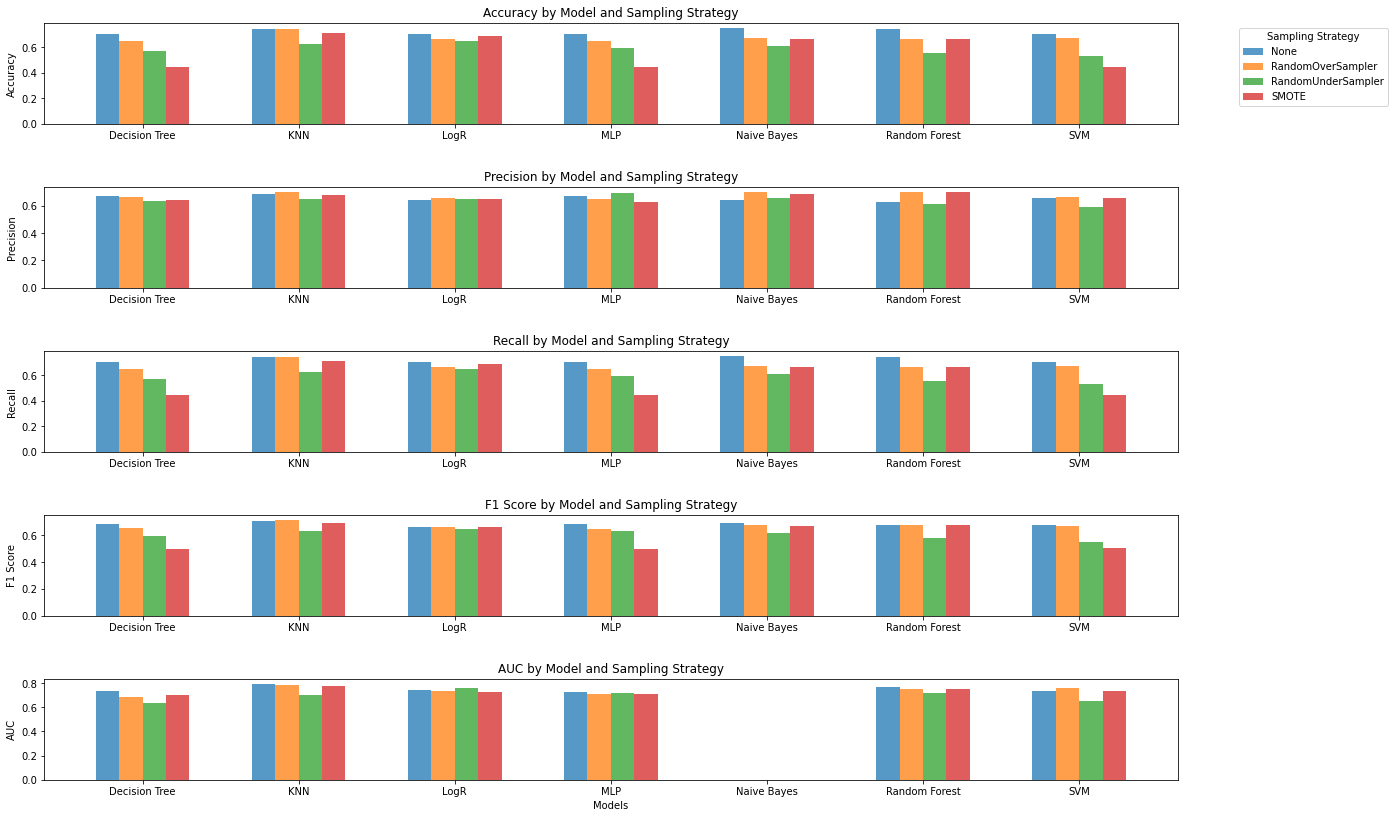

In [45]:
# Present results of all algorithms in a bar char for better comprehension.
model_names = sorted(set(key.split(" | ")[0] for key in results.keys()), key=lambda x: x.lower())

strategies = sorted(set(key.split(" | ")[1] for key in results.keys()), key=lambda x: x.lower())

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']

data = {metric: {strategy: [] for strategy in strategies} for metric in metrics}

for key, performance in results.items():
    model, strategy = key.split(" | ")
    for metric in metrics:
        data[metric][strategy].append(performance[metric])

n_models = len(model_names)
n_strategies = len(strategies)
bar_width = 0.15
index = np.arange(n_models)

plt.figure(figsize=(20, 12))

for i, metric in enumerate(metrics):
    plt.subplot(len(metrics), 1, i+1)
    for j, strategy in enumerate(strategies):
        positions = [p + (bar_width * j) for p in index]
        plt.bar(positions, data[metric][strategy], bar_width, label=f'{strategy}' if i == 0 else "", alpha=0.75)

    if i == 0:
        plt.legend(title='Sampling Strategy', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(index + bar_width * (n_strategies - 1) / 2, model_names)
    plt.ylabel(metric)
    plt.title(f'{metric} by Model and Sampling Strategy')

plt.xlabel('Models')
plt.tight_layout(pad=3.0)
plt.show()

## (7) All features & 2 balanced classes

In [46]:
# Convert values in the target feature (Response) from multiple classes to binary classes (Excellent (0) vs. Non-Excellent (1))
df['Response'] = df['Response'].apply(lambda x: 0 if x == 1 else 1)
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,27,1,0,0,0,1,4,0,2,0,1,1,1,0,1,1
1,34,1,0,1,0,1,2,0,2,0,1,1,1,0,1,0
2,30,1,0,0,0,1,3,0,2,0,1,1,1,0,1,0
3,62,1,0,0,0,1,3,0,2,0,1,1,1,0,1,0
4,62,1,0,0,0,1,2,0,2,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,0,1,1,1,1,3,1,1,0,3,7,3,1,5,1
379,81,0,1,0,1,1,2,4,1,1,3,7,3,1,5,1
380,72,0,1,1,0,1,2,3,1,1,3,7,3,1,5,1
381,61,0,1,1,1,2,2,4,4,1,3,7,3,0,4,1


In [47]:
# Check counts of each class
df['Response'].value_counts()

0    208
1    175
Name: Response, dtype: int64

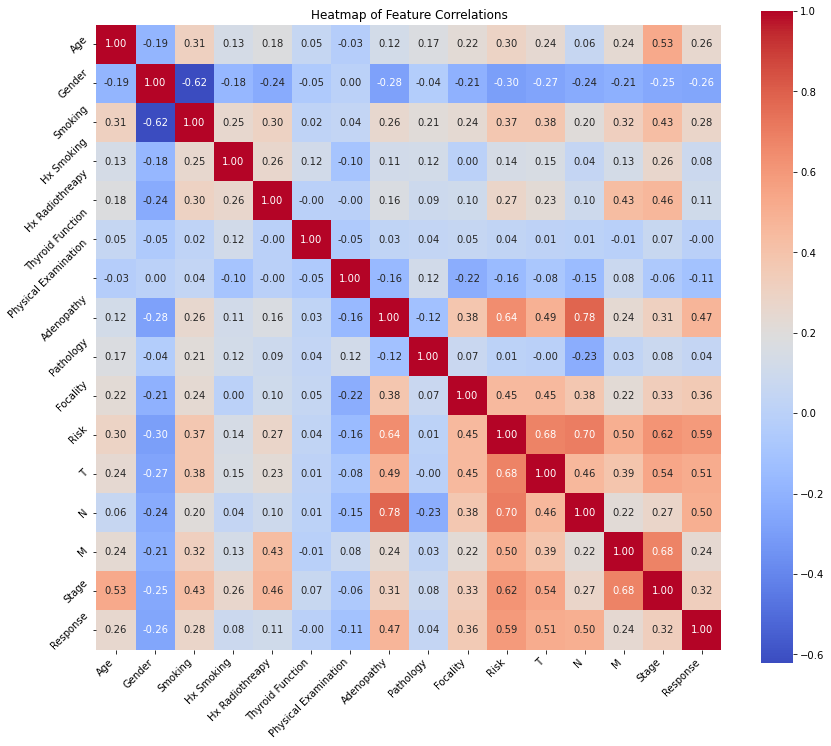

In [48]:
# Calculate the correlation matrix
corr = df.corr()

# Generate a heatmap
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Improve readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.title('Heatmap of Feature Correlations')

# Show plot
plt.show()

In [49]:
# Create 2 dataframes from the dataset: features (X) and target variable (y)
X = df.drop(['Response'], axis=1)

y = df['Response']

In [50]:
# Split the data into 4 subsets: X_train, X_test, y_train, y_test, with 20% of data will be used for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

In [51]:
# Create a dictionary of the imported models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'LogR': LogisticRegression(random_state=42, max_iter=1000),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42) 
}

In [52]:
# Train and evaluate the models            
results = {}   # a dictionary to store performance results for each algorithm to use in presenting the results in a table.

roc_curves = {} # A dictionary to store ROC curves for each model

for model_name, model in models.items():  # a FOR loop to train and evalute each model.
    
    model.fit(X_train, y_train)     # Train the model using the training data (X_train and y_train sets).
    
    y_pred = model.predict(X_test)  # Predict treatment reponse using the testing dataset (X_test).
    
    accuracy = accuracy_score(y_test, y_pred)    
    
    precision = precision_score(y_test, y_pred) 
    
    recall = recall_score(y_test, y_pred) 
    
    f1 = f1_score(y_test, y_pred)
    
    y_prob = model.predict_proba(X_test)[:, 1]  # Predict the probabilities for positive class

    fpr, tpr, _ = roc_curve(y_test, y_prob)  # Calculate the ROC curve

    roc_auc = auc(fpr, tpr)  # Calculate the AUC score

    roc_curves[model_name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}
    
    results[model_name] = {'Accuracy': round(accuracy, 3), 'Precision': round(precision, 3), 'Recall': round(recall,3), 'F1 Score': round(f1,3), 'AUC': round(roc_auc,3)}  # Store performance results for each algorithm in the previously created dictionary. The resuls were rounded to the nearest 3 decimal places. 

In [53]:
# Create a dataframe to display the performance results for each algorithm in a tabular format. 
results_df = pd.DataFrame(results).T   

print (results_df)

               Accuracy  Precision  Recall  F1 Score    AUC
Decision Tree     0.727      0.780   0.727     0.753  0.731
Naive Bayes       0.753      0.963   0.591     0.732  0.916
KNN               0.688      0.857   0.545     0.667  0.849
Random Forest     0.753      0.791   0.773     0.782  0.842
SVM               0.662      0.846   0.500     0.629  0.800
LogR              0.805      0.914   0.727     0.810  0.911
MLP               0.805      0.914   0.727     0.810  0.886


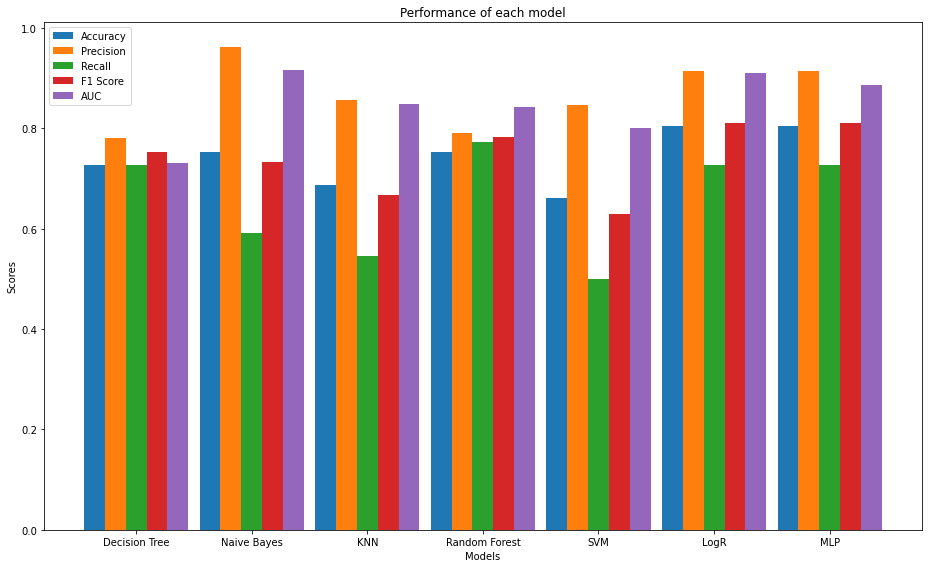

In [54]:
# Present results of all algorithms in a bar char for better comprehension.

# extract model names from the dictionary "results", and create a list of these names. 
model_names = list(results.keys())

# Extract results for each algorithm. 
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']

values = [[results[model][metric] for model in model_names] for metric in metrics]   

bar_width = 0.18   

# Create an array of indices for the x-axis based on the number of models.
index = np.arange(len(model_names)) 

# Create a grouped bar plot for each metric.
plt.figure(figsize=(13, 8))    # I create a new figure with a width of 10 inches and a height of 6 inches. 

for i in range(len(metrics)):  # Loops through each metric and plot a set of bars for each metric grouped by the index positions adjusted by the bar width.
    plt.bar(index + i * bar_width, values[i], bar_width, label=metrics[i])

# Identify the plot customizations.
plt.xlabel('Models')    # X axis label 
plt.ylabel('Scores')    # Y axis label
plt.title('Performance of each model')   # title of the plot 
plt.xticks(index + bar_width * (len(metrics) - 1) / 2, model_names)  # To set the position of the x_axis ticks at the center of each group of bars.
plt.legend()    # to show the a legend for each metrics.
plt.tight_layout()  # to adjust the subplot parameters to ensure the specified subplotd fit within the figure area.

# Show the plot.
plt.show()

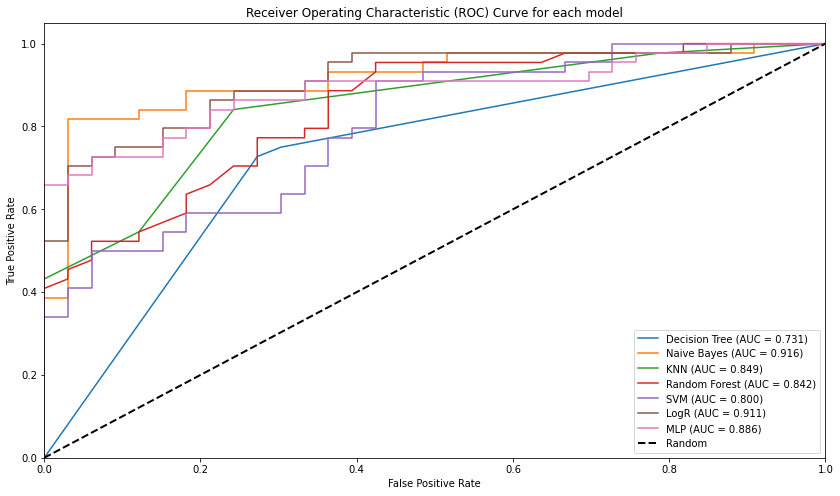

In [55]:
# Present ROC curves plot for each algorithm.
# Create a ROC curve for each metric.
plt.figure(figsize=(14, 8))    # I create a new figure with a width of 14 inches and a height of 8 inches.

# Plot ROC curves for each model
for model_name, roc_data in roc_curves.items():
    plt.plot(roc_data['fpr'], roc_data['tpr'], label=f'{model_name} (AUC = {roc_data["roc_auc"]:.3f})')

        
#Identify the plot customizations.
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each model')
plt.legend(loc="lower right")
plt.show()

## (8) Without weakly correlated features & 2 balanced classes

In [56]:
# Remove features that has weak correlation (<0.10) with treatment response (Thyroid Function and Pathology)
df_without = df.drop (["Thyroid Function","Pathology", "Hx Smoking"], axis=1)

In [57]:
# Create 2 dataframes from the dataset: features (X) and target variable (y)
X = df_without.drop(['Response'], axis=1)

y = df_without['Response']

In [58]:
# Split the data into 4 subsets: X_train, X_test, y_train, y_test, with 20% of data will be used for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [59]:
# Create a dictionary of the imported models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'LogR': LogisticRegression(random_state=42, max_iter=1000),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42) 
}

In [60]:
# Train and evaluate the models            
results = {}   # a dictionary to store performance results for each algorithm to present the results in a table.

roc_curves = {} # A dictionary to store ROC curves for each model

for model_name, model in models.items():  # a FOR loop to train and evalute each model.
    
    model.fit(X_train, y_train)     # Train the model using the training data (X_train and y_train sets).
    
    y_pred = model.predict(X_test)  # Predict treatment reponse using the testing dataset (X_test).
    
    accuracy = accuracy_score(y_test, y_pred)    
    
    precision = precision_score(y_test, y_pred) 
    
    recall = recall_score(y_test, y_pred) 
    
    f1 = f1_score(y_test, y_pred)
    
    y_prob = model.predict_proba(X_test)[:, 1]  # Predict the probabilities for positive class

    fpr, tpr, _ = roc_curve(y_test, y_prob)  # Calculate the ROC curve

    roc_auc = auc(fpr, tpr)  # Calculate the AUC score

    roc_curves[model_name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}
    
    results[model_name] = {'Accuracy': round(accuracy, 3), 'Precision': round(precision, 3), 'Recall': round(recall,3), 'F1 Score': round(f1,3), 'AUC': round(roc_auc,3)}  # Store performance results for each algorithm in the previously created dictionary. The resuls were rounded to the nearest to the nearest 3 decimal places. 

In [61]:
# Create a dataframe to display the performance results for each algorithm in a tabular format. 
results_df = pd.DataFrame(results).T   

print (results_df)

               Accuracy  Precision  Recall  F1 Score    AUC
Decision Tree     0.727      0.765   0.667     0.712  0.719
Naive Bayes       0.779      0.958   0.590     0.730  0.887
KNN               0.740      0.828   0.615     0.706  0.801
Random Forest     0.792      0.829   0.744     0.784  0.848
SVM               0.727      0.950   0.487     0.644  0.878
LogR              0.818      0.903   0.718     0.800  0.869
MLP               0.857      0.912   0.795     0.849  0.854


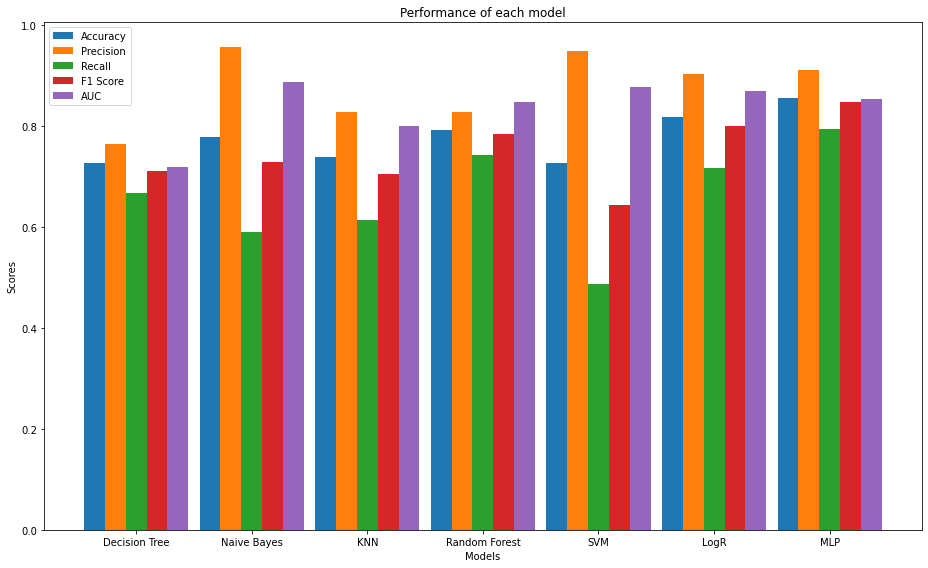

In [62]:
# Present results of all algorithms in a bar char for better comprehension.

# Extract model names from the dictionary "results", and create a list of these names. 
model_names = list(results.keys())

# Extract results for each algorithm. 
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']

values = [[results[model][metric] for model in model_names] for metric in metrics]   

bar_width = 0.18 

# Create an array of indices for the x-axis based on the number of models.
index = np.arange(len(model_names)) 

# Create a grouped bar plot for each metric.
plt.figure(figsize=(13, 8))    # I create a new figure with a width of 10 inches and a height of 6 inches. 

for i in range(len(metrics)):  # Loops through each metric and plot a set of bars for each metric grouped by the index positions adjusted by the bar width.
    plt.bar(index + i * bar_width, values[i], bar_width, label=metrics[i])

# Identify the plot customizations.
plt.xlabel('Models')    # X axis label 
plt.ylabel('Scores')    # Y axis label
plt.title('Performance of each model')   # title of the plot 
plt.xticks(index + bar_width * (len(metrics) - 1) / 2, model_names)  # To set the position of the x_axis ticks at the center of each group of bars.
plt.legend()    # to show the a legend for each metrics.
plt.tight_layout()  # to adjust the subplot parameters to ensure the specified subplotd fit within the figure area.

# Show the plot.
plt.show()

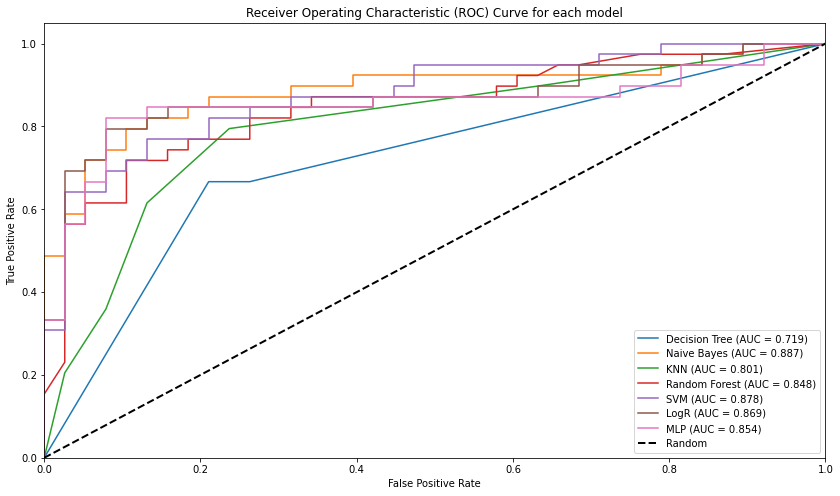

In [63]:
# Present ROC curves plot for each algorithm.
# Create a ROC curve for each metric.
plt.figure(figsize=(14, 8))    # I create a new figure with a width of 14 inches and a height of 8 inches.

# Plot ROC curves for each model
for model_name, roc_data in roc_curves.items():
    plt.plot(roc_data['fpr'], roc_data['tpr'], label=f'{model_name} (AUC = {roc_data["roc_auc"]:.3f})')

        
#Identify the plot customizations.
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each model')
plt.legend(loc="lower right")
plt.show()

## (9) With moderately-to-strongly correlated features & 2 balanced classes

In [64]:
# Create a dataframe containing features that has moderate or high correlation (>0.30) with treatment response in addition to the target feature
df_with = df[['Adenopathy', "Risk", "T", "N", "Focality", "Stage", 'Response']]

In [65]:
# Create 2 dataframes from the dataset: features (X) and target variable (y)
X = df[['Adenopathy', "Risk", "T", "N", "Smoking", "Focality", "Stage"]]

y = df['Response']

In [66]:
# Split the data into 4 subsets: X_train, X_test, y_train, y_test, with 20% of data will be used for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

In [67]:
# Create a dictionary of the imported models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'LogR': LogisticRegression(random_state=42, max_iter=1000),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000, random_state=42) 
}

In [68]:
# Train and evaluate the models            
results = {}   # a dictionary to store performance results for each algorithm to present the results in a table.

roc_curves = {} # A dictionary to store ROC curves for each model

for model_name, model in models.items():  # a FOR loop to train and evalute each model.
    
    model.fit(X_train, y_train)     # Train the model using the training data (X_train and y_train sets).
    
    y_pred = model.predict(X_test)  # Predict treatment reponse using the testing dataset (X_test).
    
    accuracy = accuracy_score(y_test, y_pred)    
    
    precision = precision_score(y_test, y_pred) 
    
    recall = recall_score(y_test, y_pred) 
    
    f1 = f1_score(y_test, y_pred)
    
    y_prob = model.predict_proba(X_test)[:, 1]  # Predict the probabilities for positive class

    fpr, tpr, _ = roc_curve(y_test, y_prob)  # Calculate the ROC curve

    roc_auc = auc(fpr, tpr)  # Calculate the AUC score

    roc_curves[model_name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}
    
    results[model_name] = {'Accuracy': round(accuracy, 3), 'Precision': round(precision, 3), 'Recall': round(recall,3), 'F1 Score': round(f1,3), 'AUC': round(roc_auc,3)}  # Store performance results for each algorithm in the previously created dictionary. The resuls were rounded to the nearest to the nearest 3 decimal places. 

In [69]:
# Create a dataframe to display the performance results for each algorithm in a tabular format. 
results_df = pd.DataFrame(results).T   

print (results_df)

               Accuracy  Precision  Recall  F1 Score    AUC
Decision Tree     0.727      0.811   0.682     0.741  0.815
Naive Bayes       0.844      0.944   0.773     0.850  0.886
KNN               0.779      0.829   0.773     0.800  0.808
Random Forest     0.766      0.825   0.750     0.786  0.832
SVM               0.805      0.914   0.727     0.810  0.852
LogR              0.805      0.914   0.727     0.810  0.874
MLP               0.779      0.886   0.705     0.785  0.835


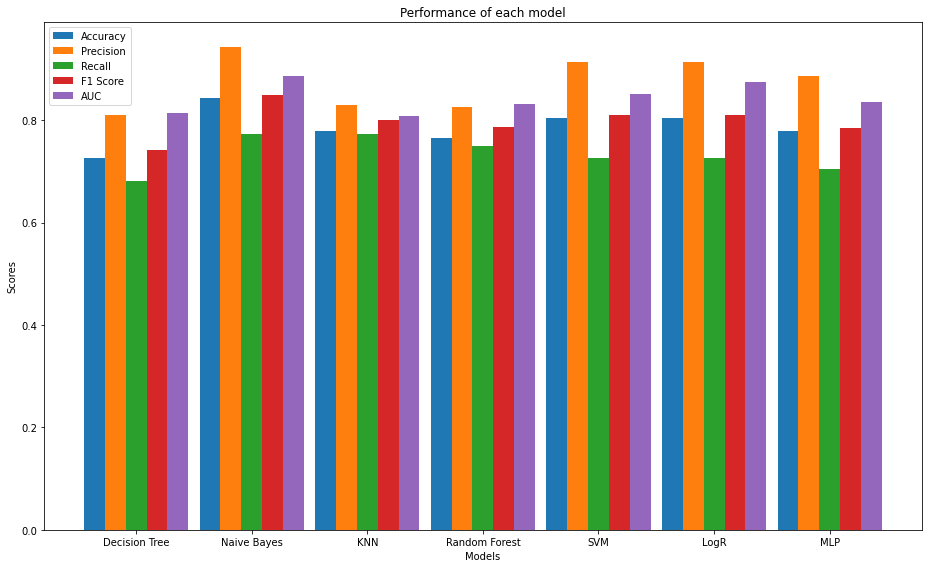

In [70]:
# Present results of all algorithms in a bar char for better comprehension.

# Extract model names from the dictionary "results", and create a list of these names. 
model_names = list(results.keys())

# Extract results for each algorithm. 
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']

values = [[results[model][metric] for model in model_names] for metric in metrics]   

bar_width = 0.18 

# Create an array of indices for the x-axis based on the number of models.
index = np.arange(len(model_names)) 

# Create a grouped bar plot for each metric.
plt.figure(figsize=(13, 8))    # I create a new figure with a width of 10 inches and a height of 6 inches. 

for i in range(len(metrics)):  # Loops through each metric and plot a set of bars for each metric grouped by the index positions adjusted by the bar width.
    plt.bar(index + i * bar_width, values[i], bar_width, label=metrics[i])

# Identify the plot customizations.
plt.xlabel('Models')    # X axis label 
plt.ylabel('Scores')    # Y axis label
plt.title('Performance of each model')   # title of the plot 
plt.xticks(index + bar_width * (len(metrics) - 1) / 2, model_names)  # To set the position of the x_axis ticks at the center of each group of bars.
plt.legend()    # to show the a legend for each metrics.
plt.tight_layout()  # to adjust the subplot parameters to ensure the specified subplotd fit within the figure area.

# Show the plot.
plt.show()

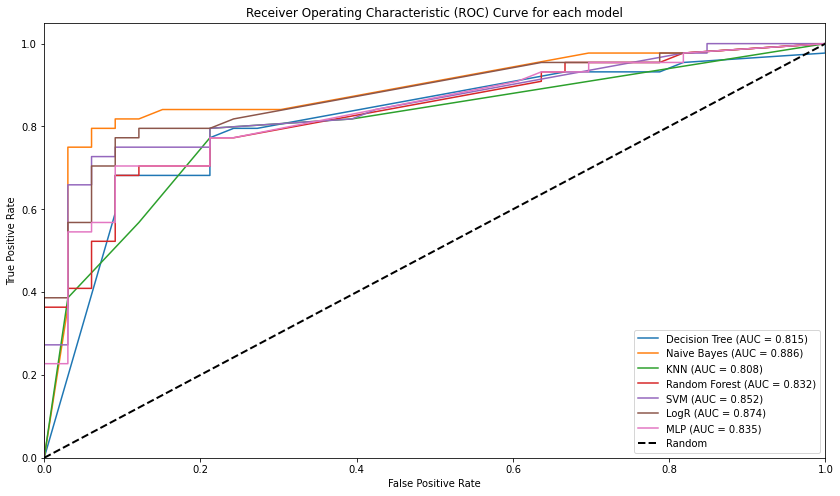

In [71]:
# Present ROC curves plot for each algorithm.
# Create a ROC curve for each metric.
plt.figure(figsize=(14, 8))    # I create a new figure with a width of 14 inches and a height of 8 inches.

# Plot ROC curves for each model
for model_name, roc_data in roc_curves.items():
    plt.plot(roc_data['fpr'], roc_data['tpr'], label=f'{model_name} (AUC = {roc_data["roc_auc"]:.3f})')

        
#Identify the plot customizations.
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each model')
plt.legend(loc="lower right")
plt.show()